In [1]:
import pandas as pd
from ktrain import text
from transformers import AutoTokenizer, AutoConfig, TFAutoModelForSequenceClassification
from transformers import pipeline
import fasttext
import nltk
import time

In [2]:
ts = text.TransformerSummarizer()
ts2 = pipeline("summarization", model="t5-large", tokenizer="t5-large", framework="tf")
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased', use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("model")
model_ft = fasttext.load_model("fasttext/model.bin")

In [3]:
def predict(text):
    return model(tokenizer.encode(text, return_tensors='tf', max_length=512))[0].numpy()[0][0]

def predict_ft(text):
    return model_ft.predict(" ".join(nltk.word_tokenize(text)))

def print_and_summarize(row):
    text = row['text']
    stars = row['stars']
    print("ORIGINAL TEXT")
    print("\n")
    print(text)
    print("\n")
    print("-------------------------------------------------------------")
    print("\n")
    print("summarizing...")
    start = time.time()
    summary = ts.summarize(text)
    print(f"done. took {time.time() - start} seconds")
    print("\n")
    print("SUMMARY")
    print("\n")
    print(summary)
    print("\n")
    print("-------------------------------------------------------------")
    print("\n")
    print("summarizing 2...")
    start = time.time()
    summary2 = ts2(text, min_length=42, clean_up_tokenization_spaces=True, max_length=1024)[0]['summary_text']
    print(f"done. took {time.time() - start} seconds")
    print("\n")
    print("SUMMARY 2")
    print("\n")
    print(summary2)
    print("\n")
    print("-------------------------------------------------------------")
    print("\n")
    print("original star", stars)
    print("\n")
    print("original pred", predict(text))
    print("summary pred", predict(summary))
    print("summary2 pred", predict(summary2))
    print("original ft pred", predict_ft(text))
    print("summary ft pred", predict_ft(summary))
    print("summary2 ft pred", predict_ft(summary2))

In [4]:
df1 = pd.read_csv("preds-copy.csv", header=None, names=['idx', 'text', 'stars', 'pred'])
df2 = pd.read_csv("preds.csv", header=None, names=['idx', 'text', 'stars', 'pred'])

In [5]:
df1.shape, df2.shape

((300823, 4), (36258, 4))

In [6]:
df1.tail()

,idx,text,stars,pred
300818,300818,Went for a late lunch around 3:30 and the plac...,4.0,3.385736
300819,300819,It receives a two star only because I was sitt...,2.0,1.963099
300820,300820,I ordered breakfast for my family this morning...,1.0,1.218617
300821,300821,"The owner of Plant Wise, Michelle, really did ...",5.0,5.107769
300822,300822,If you want to go somewhere that you will be w...,5.0,5.020714


In [7]:
df2.head()

,idx,text,stars,pred
0,300823,We are waiting for our food. Seated in the bar...,2.0,2.385927
1,300824,This is the letter that I wrote and mailed to ...,2.0,1.487109
2,300825,My mom was visiting and she wanted to get her ...,5.0,5.124286
3,300826,Green chile and pork are like peanut butter an...,4.0,5.077338
4,300827,I booked massages and facials for two friends ...,4.0,5.047493


In [13]:
df = pd.concat([df1, df2]).reset_index(drop=True)
df.shape

(337081, 4)

In [14]:
df.head()

,idx,text,stars,pred
0,0,Really great local auto repair spot... really ...,5.0,4.891084
1,1,Best Oyster House in Toronto. Great variety a...,5.0,5.034161
2,2,We thoroughly enjoy eating here. We go here at...,5.0,4.932011
3,3,OMG!!! So good!!!! I was in AZ for work and I...,5.0,5.016096
4,4,We are here once over a year ago before we mov...,1.0,2.771281


In [15]:
df.tail()

,idx,text,stars,pred
337076,337076,I love Nordstrom's Cafe . This one isn't as ni...,4.0,3.790603
337077,337077,I kinda don't want to even review this place b...,4.0,3.887439
337078,337078,This place is small. It is also awesome. And w...,5.0,4.862274
337079,337079,Is this place still under construction? The Ta...,2.0,1.629497
337080,337080,Counter person ..... male from Kentucky ..... ...,5.0,5.098188


In [16]:
df.isna().sum()

idx      0
text     0
stars    0
pred     0
dtype: int64

In [17]:
df['abs_err'] = abs(df['stars'] - df['pred'])

In [18]:
df['abs_err'].mean()

0.3267117477810095

In [19]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


Lots of activity at the park saturday. Parked car and was able to find a few trails.

Was wanting to get some sun and move around and this place did not disappoint . Did not bring water or sunscreen so walked until i got thirsty then started down.

A lot of families out and milling around. Did notice alot of people with inadequate foot wear but to each their own i guess.

Will be better prepared next time and go earlier.


-------------------------------------------------------------


summarizing...
done. took 28.72334098815918 seconds


SUMMARY


A lot of families out and milling around. Did notice alot of people with inadequate foot wear but to each their own i guess. Will be better prepared next time and go earlier. Didn't bring water or sunscreen so walked until i got thirsty then started down. Was wanting to get some sun and move around.


-------------------------------------------------------------


summarizing 2...
done. took 87.49711990356445 seconds


SUMMAR

In [20]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


I'm not sure why I keep going there 
Look like the Shef is always bored at his job.same stupid jokes no eye contact with his costumers 
The food is ok but wayyyyyyy to much food for one person 
I will cut the crazy prices they have a little and serve a little less food 
We were 6 friends and none of us finish his food 
Also the drink are way to priced


-------------------------------------------------------------


summarizing...
done. took 28.131993055343628 seconds


SUMMARY


The food is ok but wayyyyyyy to much food for one person. We were 6 friends and none of us finish his food. Also the drink are way to priced. I'm not sure why I keep going there  I will cut the crazy prices they have a little and serve a little less food.


-------------------------------------------------------------


summarizing 2...
done. took 111.02131199836731 seconds


SUMMARY 2


I'm not sure why i keep going there Look like the shef is always bored at his job.same stupid jokes no eye c

In [21]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


Well I Drove 20 mins on my lunch break to try this after seening a Dominic Armato review on FB. And it was ment to be lol Its was greatness! Got a 10 peice dinner, comes with a bunch of fries n 1 peice of white bread and a shot of slaw.  I love the seasoning on the chicken n that mild sauce is so good. Very juicy n crispy wings and Super nice people!


-------------------------------------------------------------


summarizing...
done. took 29.3078670501709 seconds


SUMMARY


I love the seasoning on the chicken n that mild sauce is so good. Very juicy n crispy wings and Super nice people! Got a 10 peice dinner, comes with a bunch of fries n 1 peice of white bread and a shot of slaw. It was greatness!


-------------------------------------------------------------


summarizing 2...
done. took 103.38708400726318 seconds


SUMMARY 2


i got a 10 peice dinner, comes with a bunch of fries n 1 peice of white bread and a shot of slaw. i love the seasoning on the chicken n th

In [22]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


Great concept and the staff were nice. I got the hotdog with the red and green sauce mixed together. It had a good spice to it and was pretty good. I love mexican corn so I split one with my gf, Pretty much what I expected it to be, mmmmmm. They have a large selection of hot sauces and have tvs that were showing college hoops.


-------------------------------------------------------------


summarizing...
done. took 30.247546911239624 seconds


SUMMARY


Great concept and the staff were nice. I got the hotdog with the red and green sauce mixed together. It had a good spice to it and was pretty good. I love mexican corn so I split one with my gf, Pretty much what I expected it to be, mmmmmm.


-------------------------------------------------------------


summarizing 2...
done. took 96.17940902709961 seconds


SUMMARY 2


they have a large selection of hot sauces and have tvs that were showing college hoops. the staff was nice and the food was good. they also had a sel

In [23]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


Absolutely love this school and its teachers. My child is growing in leaps and bounds with the support of the great staff.


-------------------------------------------------------------


summarizing...
done. took 24.42532181739807 seconds


SUMMARY


"My child is growing in leaps and bounds with the support of the great staff. Absolutely love this school and its teachers," says mother. "I am so proud of my son," adds mother of two. "He is a very happy and healthy boy," adds father of one.


-------------------------------------------------------------


summarizing 2...
done. took 90.71064615249634 seconds


SUMMARY 2


absolutely love this school and its teachers. my child is growing in leaps and bounds with the support of the great staff. i'm so grateful for all the help i get from the staff and parents.


-------------------------------------------------------------


original star 5.0


original pred 5.088924
summary pred 5.08199
summary2 pred 5.0798078
original f

In [24]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


You expect to exit and instead of Durango you're looking at the ocean off Ala Moana Blvd. That's how authentic this place is. Tasty food served with the spirit of aloha. Mixed plate will give you your best value but everything is always delicious and plentiful.

Also. If I am to be stranded on an island with only one thing to eat the rest of my life, let it be their spicy avocado poke. Amazing.


-------------------------------------------------------------


summarizing...
done. took 51.929447174072266 seconds


SUMMARY


Mixed plate will give you your best value but everything is always delicious and plentiful. You expect to exit and instead of Durango you're looking at the ocean off Ala Moana Blvd. That's how authentic this place is. Tasty food served with the spirit of aloha.


-------------------------------------------------------------


summarizing 2...
done. took 132.92421889305115 seconds


SUMMARY 2


if i am stranded on an island with only one thing to eat t

In [25]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


Great experience, I've been looking for an African American dermatologist which has been a little difficult in Charlotte if you want an appointment that's less than 6 months away but I digress. I was able to get an appointment with Dr Chambers pretty quickly, she is a new doctor to the practice but has a lot of experience. 
She and her team are really nice and attentive. She really listens and asks a lot of questions to understand so she can prescribe the right medicine to fix the issue. I went to another dermatologist before coming to Dr Chambers and was not diagnosed correctly for a discolored spot on my face and Dr Chambers was able to correct diagnose and prescribed me medicine that cleared the spot almost immediately. 
My appointments are always prompt and quick and the treatment is affordable. I would recommend Dr Chambers to anyone for any dermatology issues.


-------------------------------------------------------------


summarizing...
done. took 53.9447329044

In [26]:
df['abs_err'].describe()

count    3.370810e+05
mean     3.267117e-01
std      3.792815e-01
min      2.384186e-07
25%      7.006383e-02
50%      1.599469e-01
75%      4.890494e-01
max      4.127761e+00
Name: abs_err, dtype: float64

In [27]:
top_losses = df[df['abs_err'] > 0.48]
top_losses.shape

(85930, 5)

In [28]:
len(top_losses) / len(df)

0.2549238906968948

In [29]:
top_losses['stars'].value_counts().sort_values(ascending=False)

4.0    32624
3.0    16713
5.0    14524
2.0    11791
1.0    10278
Name: stars, dtype: int64

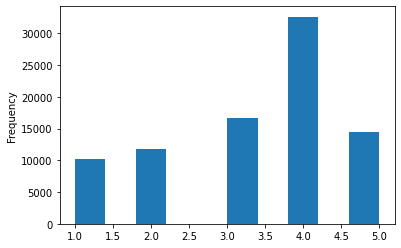

In [30]:
top_losses['stars'].plot.hist();

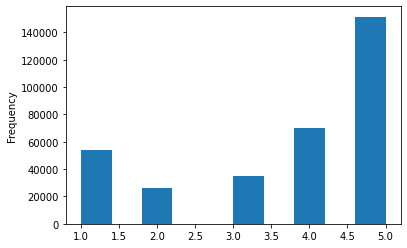

In [31]:
df['stars'].plot.hist();

In [32]:
top_losses.sort_values('abs_err').head(10)

,idx,text,stars,pred,abs_err
162196,162196,This is my second time (and last time) here. I...,1.0,1.480003,0.480003
98158,98158,Pho tai gan. the soup broth was yummy. rmeind...,4.0,3.519995,0.480005
128396,128396,I defended the Buffet @ Bellagio even when my ...,1.0,1.480011,0.480011
181881,181881,Located in San Marco Square in the Venetian - ...,4.0,4.480015,0.480015
319803,319803,"I love Javier's. Great chips, salsa, and guac...",4.0,4.480019,0.480019
271959,271959,I had an almond mocha custard and it was great...,4.0,4.480022,0.480022
76984,76984,"If I weren't already at Wynn, I wouldn't eat a...",3.0,3.480042,0.480042
144802,144802,Our visit started a bit rocky but once the roa...,4.0,4.480050,0.480050
42272,42272,I don't visit bars often but Dodey's is certai...,5.0,4.519950,0.480050
12162,12162,"Fantastic Mexican food, servers are good about...",5.0,4.519940,0.480060


In [33]:
top_losses = df[df['abs_err'] > 1]
top_losses.shape

(18613, 5)

In [34]:
len(top_losses) / len(df)

0.05521818197999887

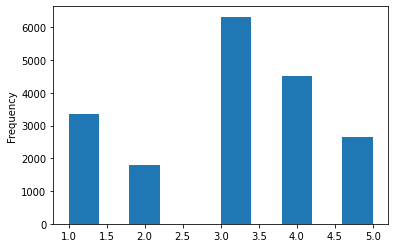

In [35]:
top_losses['stars'].plot.hist();

In [36]:
top_losses.sort_values('abs_err').head(10)

,idx,text,stars,pred,abs_err
216256,216256,"Pros: Great meat department, underground parki...",1.0,2.000016,1.000016
109025,109025,Thanks to all the Cats that reviewed this spot...,4.0,5.000041,1.000041
28498,28498,"Hidden spot, chic atmosphere, modern and fun ....",4.0,5.000047,1.000047
95731,95731,Always have a great time at Fix! Friendly sta...,4.0,5.000047,1.000047
32314,32314,I stop at this location often whenever in Phoe...,3.0,1.999944,1.000056
153994,153994,Not a fan of their fries. Burger was okay. I g...,4.0,2.999937,1.000063
52939,52939,This place needs two listings!!! The coffee he...,3.0,1.999933,1.000067
309445,309445,3 Words For You: BLOODY MARY BAR!\n\nSaturday...,4.0,5.000072,1.000072
266924,266924,This post is for Chris from freevegasclubpasse...,4.0,5.000095,1.000095
176526,176526,One of the best bar and grill in town! You can...,4.0,5.000104,1.000104


In [37]:
top_losses = df[df['abs_err'] > 1.5]
top_losses.shape

(4934, 5)

In [38]:
len(top_losses) / len(df)

0.014637431359228197

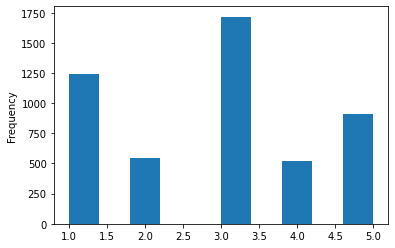

In [39]:
top_losses['stars'].plot.hist();

In [40]:
top_losses.sort_values('abs_err').head(10)

,idx,text,stars,pred,abs_err
312919,312919,Not the best Pho place at all! I definitely wo...,1.0,2.500238,1.500238
315777,315777,Walked in for breakfast. Wasn't greeted; coun...,3.0,1.499741,1.500259
164186,164186,"If you want some authentic Chinese food, this ...",3.0,4.500262,1.500262
236124,236124,Yelp usually helps me find new places to try i...,2.0,3.500432,1.500432
304180,304180,Great selection of beers on tap.\n\nService wa...,1.0,2.500483,1.500483
248347,248347,I was a little disappointed that the app gives...,4.0,2.499429,1.500571
287916,287916,I can't wait till they build the new one. This...,1.0,2.500592,1.500592
91282,91282,Came here for a business dinner with a group. ...,3.0,4.500625,1.500625
204766,204766,"I've been here a few times before, and have ra...",4.0,2.499327,1.500673
32127,32127,"Food is great, however it doesn't matter what ...",1.0,2.500680,1.500680


In [42]:
top_top_losses = top_losses[top_losses['abs_err'] > 2]

In [43]:
top_top_losses.shape

(1542, 5)

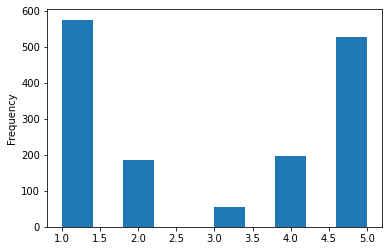

In [44]:
top_top_losses['stars'].plot.hist();

In [45]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


I bought a new Samsung refrigerator. They delivered it but couldn't hook it up or take the old one because it was hooked up to a water softener. Why on earth didn't they ask that question before delivering it?  I could've had it already to go for them. Am I the only one in the desert with a water softener? The delivery guy even said that previous clients were mad because of this. Like I don't have anything better to do to try to work this out and I'll bet you money it's not a simple phone call. The delivery guys were very nice. I must give a shout out to BARBARA who went above and beyond to help us with our purchase. Super knowledgeable and didn't rush us at all. She gets 5+ STARS!
Update: Got someone on the phone right away. No hassle and they came and picked it up.


-------------------------------------------------------------


summarizing...
done. took 125.47715497016907 seconds


SUMMARY


I bought a new Samsung refrigerator. They delivered it but couldn't hook it

In [46]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


You can't get any divier that Jack's. This is the low of the low, the dregs of the Burgh, the armpit of the city, the thorn of Carson ST, and the black eye of the South Side. It's so bad you have to love it. Open 365 days a year (yes, they are even open Christmas Day) this is a bar you can get falling down, pee on a cop car drunk for under 10 bucks. Don't EVEN ask for a fancy shmancy drink here, odds are they won't know how to make it. This is your atypical steel city shot and a beer bar, enter at your own risk, you have been warned.


-------------------------------------------------------------


summarizing...
done. took 118.5261869430542 seconds


SUMMARY


Jack's is open 365 days a year. You can get falling down, pee on a cop car drunk for under 10 bucks. Don't EVEN ask for a fancy shmancy drink here, odds are they won't know how to make it. This is your atypical steel city shot and a beer bar, enter at your own risk.


---------------------------------------------

In [47]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


Not bad service was good what I order sweet and sour vegetables an beef and sticky rice was good little to pricey but I'll come back.


-------------------------------------------------------------


summarizing...
done. took 128.84621024131775 seconds


SUMMARY


The food was good but a little to pricey but I'll come back. Not bad service was good what I order sweet and sour vegetables an beef and sticky rice was good little to expensive but I will come back to this restaurant again. The food is good and the service is good, not bad at all.


-------------------------------------------------------------


summarizing 2...
done. took 200.9393081665039 seconds


SUMMARY 2


not bad service was good what i order sweet and sour vegetables an beef and sticky rice was good little to pricey but i'll come back. a little to expensive but hey, it's a korean restaurant.


-------------------------------------------------------------


original star 1.0


original pred 3.668353
su

In [48]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


Good times.  Great for St. Patty's!!  Get in early to grab yourself a table and start collecting the celebratory plastic cups.


-------------------------------------------------------------


summarizing...
done. took 64.69370198249817 seconds


SUMMARY


Get in early to grab yourself a table and start collecting the celebratory plastic cups. Good times.  Great for St. Patty's!!  Get in early, grab yourself an early table and begin collecting the Celebratory Plastic Cups. Good Times. Great For St.Patty's!!


-------------------------------------------------------------


summarizing 2...
done. took 161.23333978652954 seconds


SUMMARY 2


get in early to grab yourself a table and start collecting the celebratory plastic cups. if you're going to eat, make sure you have a plate and a glass of wine.


-------------------------------------------------------------


original star 2.0


original pred 4.315111
summary pred 4.3797874
summary2 pred 2.4374237
original ft pred ((

In [49]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


I love this place and all the people working, But Abbass makes me feel uncomfortable and he is a bit rude


-------------------------------------------------------------


summarizing...
done. took 86.1896071434021 seconds


SUMMARY


"I love this place and all the people working, But Abbass makes me feel uncomfortable and he is a bit rude," she says. "I love the people and the place, but Abbass is rude and he makes me uncomfortable," she adds. "He's a bit of a jerk," adds the singer, who has worked with Abbass in the past.


-------------------------------------------------------------


summarizing 2...
done. took 177.99539613723755 seconds


SUMMARY 2


I love this place and all the people working, but abbass makes me feel uncomfortable and he is a bit rude. i would not recommend this place to anyone. the staff are very friendly and the food is good.


-------------------------------------------------------------


original star 1.0


original pred 3.390498
summary p

In [50]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


Joshua left without installing the drain pipe to the washer and water got everywhere in our laundry room on our first run. Thank god we were home and caught it early, otherwise, we would've been screwed. He came back to finish the job, but I don't know how you miss something so significant.


-------------------------------------------------------------


summarizing...
done. took 59.45236778259277 seconds


SUMMARY


Joshua left without installing the drain pipe to the washer and water got everywhere in our laundry room on our first run. Thank god we were home and caught it early, otherwise, we would've been screwed. He came back to finish the job, but I don't know how you miss something so significant.


-------------------------------------------------------------


summarizing 2...
done. took 157.19093704223633 seconds


SUMMARY 2


Joshua left without installing the drain pipe to the washer. he came back to finish the job, but i don't know how you miss something so

In [53]:
top_top_losses.sort_values("abs_err", ascending=False).head()

,idx,text,stars,pred,abs_err
315898,315898,Closed down. The all stars at this salon start...,1.0,5.127761,4.127761
303112,303112,Mike was awesome! Came out and fixed my leaky ...,1.0,5.113144,4.113144
63140,63140,Best place in town to grab what you need in a ...,1.0,5.111990,4.111990
101050,101050,Great start for my 1st week! Cant wait to star...,1.0,5.103042,4.103042
289503,289503,I recently went to a retail store in Hillcrest...,1.0,5.093112,4.093112
